In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
# Load dataset
df = pd.read_csv("world_population.csv")

# Clean column names
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace(r'[^\w]', '', regex=True)

# Display columns to verify
print("Columns:", df.columns.tolist())

# Preview the data
print(df.head())


Columns: ['Rank', 'CCA3', 'CountryTerritory', 'Capital', 'Continent', '2022_Population', '2020_Population', '2015_Population', '2010_Population', '2000_Population', '1990_Population', '1980_Population', '1970_Population', 'Area_km²', 'Density_per_km²', 'Growth_Rate', 'World_Population_Percentage']
   Rank CCA3 CountryTerritory           Capital Continent  2022_Population  \
0    36  AFG      Afghanistan             Kabul      Asia         41128771   
1   138  ALB          Albania            Tirana    Europe          2842321   
2    34  DZA          Algeria           Algiers    Africa         44903225   
3   213  ASM   American Samoa         Pago Pago   Oceania            44273   
4   203  AND          Andorra  Andorra la Vella    Europe            79824   

   2020_Population  2015_Population  2010_Population  2000_Population  \
0         38972230         33753499         28189672         19542982   
1          2866849          2882481          2913399          3182021   
2         434

In [5]:
# Find any column containing 'population'
target_col = [col for col in df.columns if 'population' in col.lower()]
print("Target column found:", target_col)

# Use first match as population column
if target_col:
    target = target_col[0]
else:
    raise ValueError("No column containing 'population' found.")

# Drop rows with missing values in the target
df = df.dropna(subset=[target])

Target column found: ['2022_Population', '2020_Population', '2015_Population', '2010_Population', '2000_Population', '1990_Population', '1980_Population', '1970_Population', 'World_Population_Percentage']


In [7]:
# Fill missing numeric columns with median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

print("Remaining missing values:", df.isnull().sum().sum())

Remaining missing values: 0


             Rank  2022_Population  2020_Population  2015_Population  \
count  234.000000     2.340000e+02     2.340000e+02     2.340000e+02   
mean   117.500000     3.407441e+07     3.350107e+07     3.172996e+07   
std     67.694165     1.367664e+08     1.355899e+08     1.304050e+08   
min      1.000000     5.100000e+02     5.200000e+02     5.640000e+02   
25%     59.250000     4.197385e+05     4.152845e+05     4.046760e+05   
50%    117.500000     5.559944e+06     5.493074e+06     5.307400e+06   
75%    175.750000     2.247650e+07     2.144798e+07     1.973085e+07   
max    234.000000     1.425887e+09     1.424930e+09     1.393715e+09   

       2010_Population  2000_Population  1990_Population  1980_Population  \
count     2.340000e+02     2.340000e+02     2.340000e+02     2.340000e+02   
mean      2.984524e+07     2.626947e+07     2.271022e+07     1.898462e+07   
std       1.242185e+08     1.116982e+08     9.783217e+07     8.178519e+07   
min       5.960000e+02     6.510000e+02    

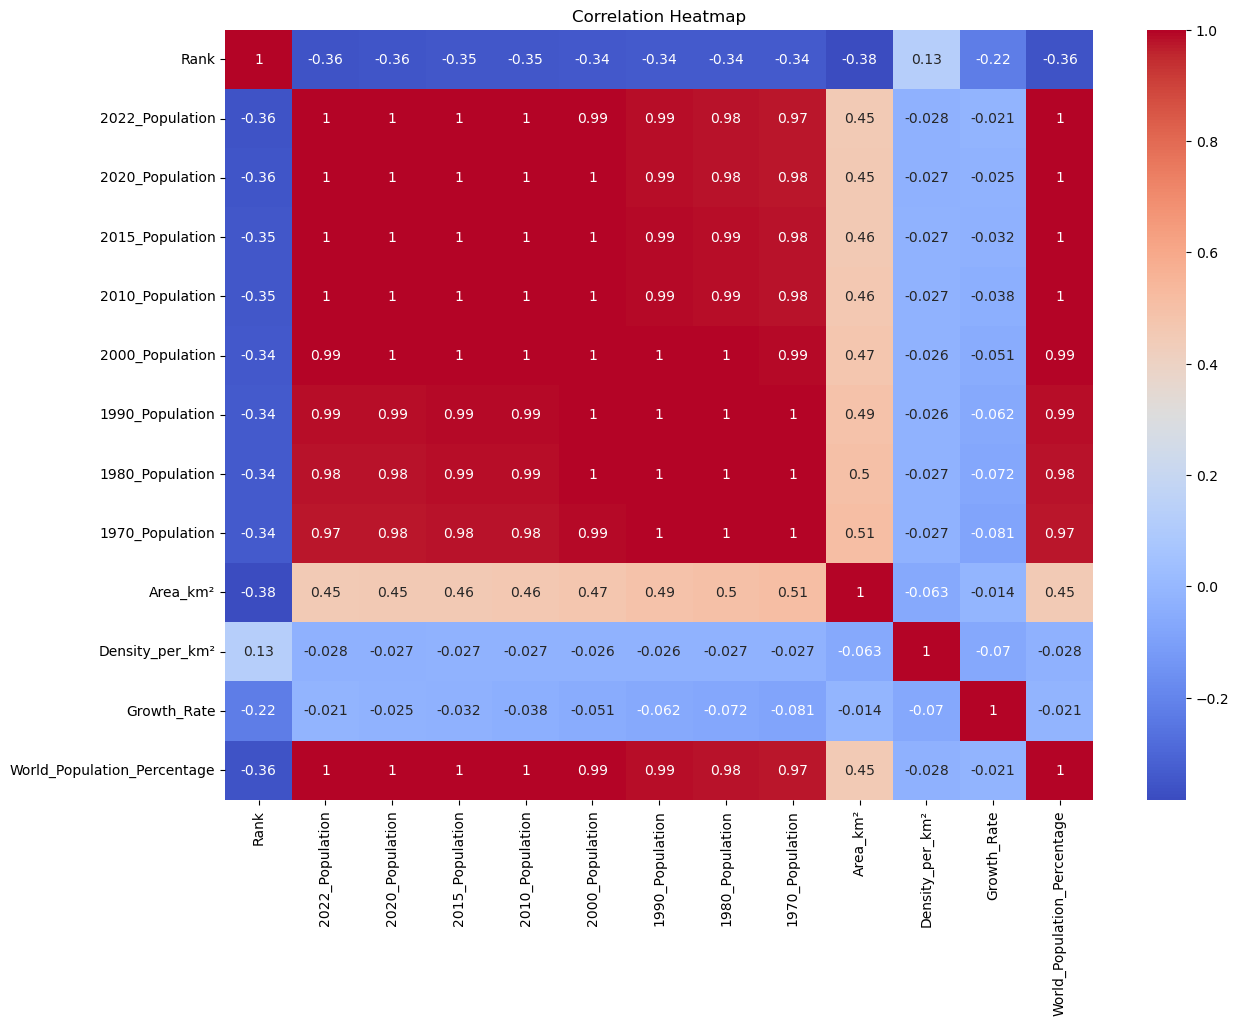

In [9]:
# Summary stats
print(df.describe())

# Correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

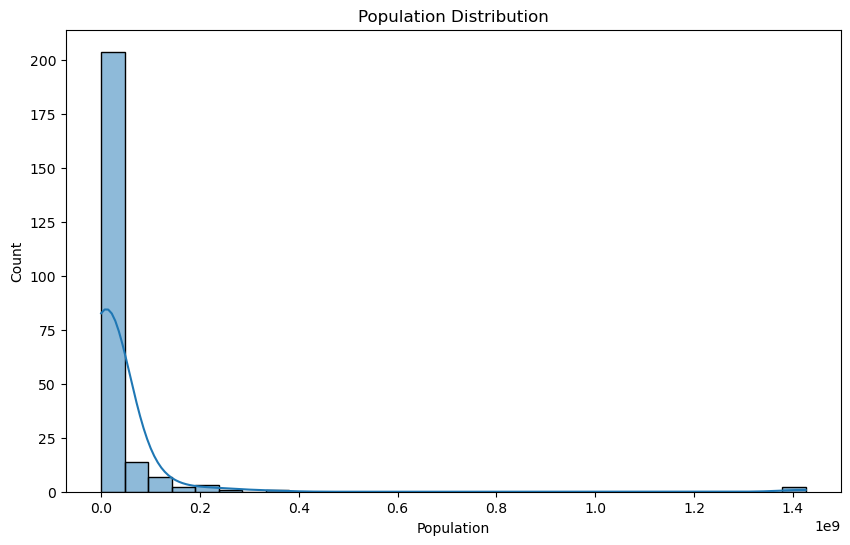

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df[target], bins=30, kde=True)
plt.title("Population Distribution")
plt.xlabel("Population")
plt.show()

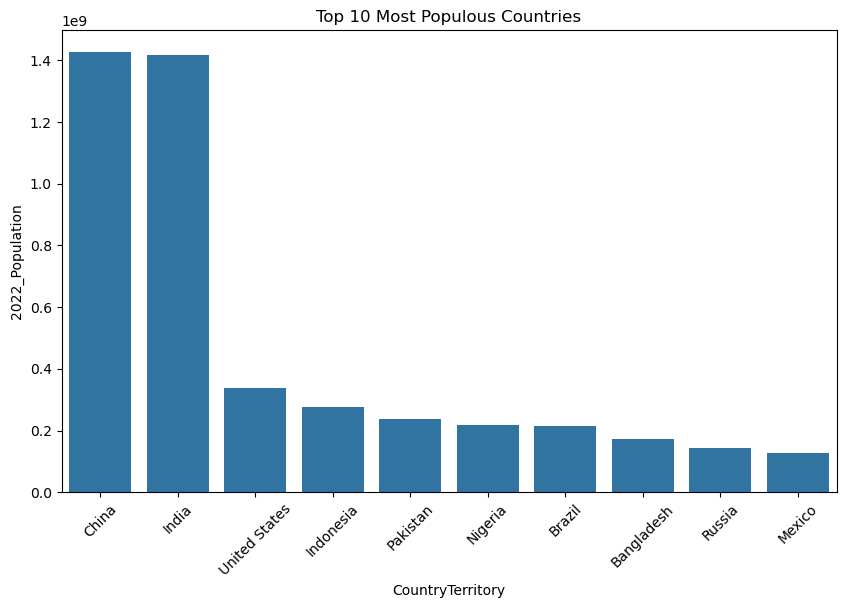

In [13]:
country_col = [col for col in df.columns if 'country' in col.lower()]
if country_col:
    top10 = df.sort_values(by=target, ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top10[country_col[0]], y=top10[target])
    plt.xticks(rotation=45)
    plt.title("Top 10 Most Populous Countries")
    plt.show()

In [15]:
if 'Year' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Year', y=target)
    plt.title("Population Over Time")
    plt.show()

In [17]:
# Drop target and non-numeric/categorical columns
X = df.drop(columns=[target])
X = pd.get_dummies(X, drop_first=True)  # handle categorical vars
y = df[target]

In [19]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R² Score: 0.9841060971992278
RMSE: 7207141.374603653


C:\Users\moraj\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


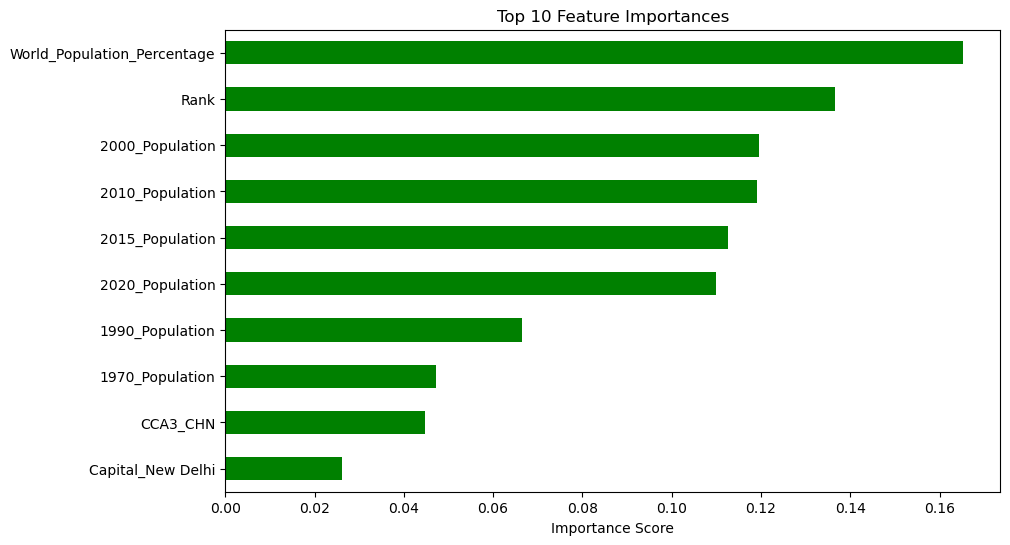

In [21]:
# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.nlargest(10)

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='green')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()